# TALENT OPTIMIZATION FOR ABC CORPORATION

## 🔬 Analysis

### Dataset: `hr_clean_data.csv`  



**Objective**: Identifying trends and patterns that help us to provide the best solutions for the company.

In [3]:
# Importing necessary libraries

# Data handling
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Evaluating linearity of relationships between variables
# -----------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuration
# -----------------------------------------------------------------------
pd.set_option("display.max_columns", None)  # to display all DataFrame columns

# Warning management
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Exporting the dataset
df = pd.read_csv("../data/processed/hr_clean_data.csv", index_col=0)

In [5]:
df.head(1)

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,salary
0,No,non-travel,2015.72,Research & Development,6,Bachelor,NaN,1,1,Male,NaN,3,5,Research director,3,Unknown,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,NaN,15,15,1972,Yes,195370.0


🔎 Heatmap to provide insight into the data

In [6]:
df_numeric = df.select_dtypes(include=["number"])
df_corr = df_numeric.corr(method="spearman")
df_corr

,dailyrate,distancefromhome,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary
dailyrate,1.000000,0.002264,-0.320877,-0.001315,1.000000,-0.003851,0.944917,-0.004535,1.000000,0.168364,-0.042501,-0.030097,0.003676,0.047524,0.696070,-0.039136,0.026942,0.468319,0.257213,0.362837,-0.473189,0.996995
distancefromhome,0.002264,1.000000,-0.010104,-0.008927,0.002177,0.028308,0.016072,0.007592,0.002264,0.022006,0.048240,0.029320,0.005338,0.043674,-0.031538,-0.052078,-0.036478,-0.015424,-0.024378,-0.014242,0.018656,-0.000343
employeenumber,-0.320877,-0.010104,1.000000,-0.017625,-0.359411,0.007590,-0.308251,0.008733,-0.320877,0.084187,-0.002266,-0.046093,-0.003240,-0.052760,-0.388625,0.008148,-0.008811,-0.651688,-0.374922,-0.550639,0.164749,-0.318874
environmentsatisfaction,-0.001315,-0.008927,-0.017625,1.000000,0.046638,-0.026289,0.010790,0.027780,-0.001315,-0.008112,-0.034052,-0.014410,0.005035,0.004765,0.011409,-0.040696,0.059837,0.013636,0.035814,0.005280,-0.003222,-0.003108
hourlyrate,1.000000,0.002177,-0.359411,0.046638,1.000000,-0.013382,0.947268,0.021367,1.000000,0.146954,-0.012783,0.018184,0.066669,0.074508,0.713388,-0.094607,-0.001018,0.486518,0.224074,0.339849,-0.498462,1.000000
jobinvolvement,-0.003851,0.028308,0.007590,-0.026289,-0.013382,1.000000,-0.003778,-0.010614,-0.003851,0.024892,-0.005998,-0.023250,0.038432,0.048506,0.034063,0.006675,-0.023128,0.021764,-0.006973,0.050327,-0.041914,-0.004008
joblevel,0.944917,0.016072,-0.308251,0.010790,0.947268,-0.003778,1.000000,-0.012870,0.944917,0.174150,-0.037048,-0.021237,0.008850,0.050809,0.728240,-0.025442,0.029484,0.476567,0.255848,0.366739,-0.486174,0.942077
jobsatisfaction,-0.004535,0.007592,0.008733,0.027780,0.021367,-0.010614,-0.012870,1.000000,-0.004535,-0.053438,0.032164,-0.006149,-0.009525,0.016304,-0.020564,-0.001101,-0.036222,0.010673,0.009088,-0.017182,0.010555,-0.006487
monthlyrate,1.000000,0.002264,-0.320877,-0.001315,1.000000,-0.003851,0.944917,-0.004535,1.000000,0.168364,-0.042501,-0.030097,0.003676,0.047524,0.696070,-0.039136,0.026942,0.468319,0.257213,0.362837,-0.473189,0.996995
numcompaniesworked,0.168364,0.022006,0.084187,-0.008112,0.146954,0.024892,0.174150,-0.053438,0.168364,1.000000,0.003944,0.004875,0.054319,0.040901,0.335471,-0.061361,0.007532,-0.178405,-0.072908,-0.152027,-0.338485,0.167936


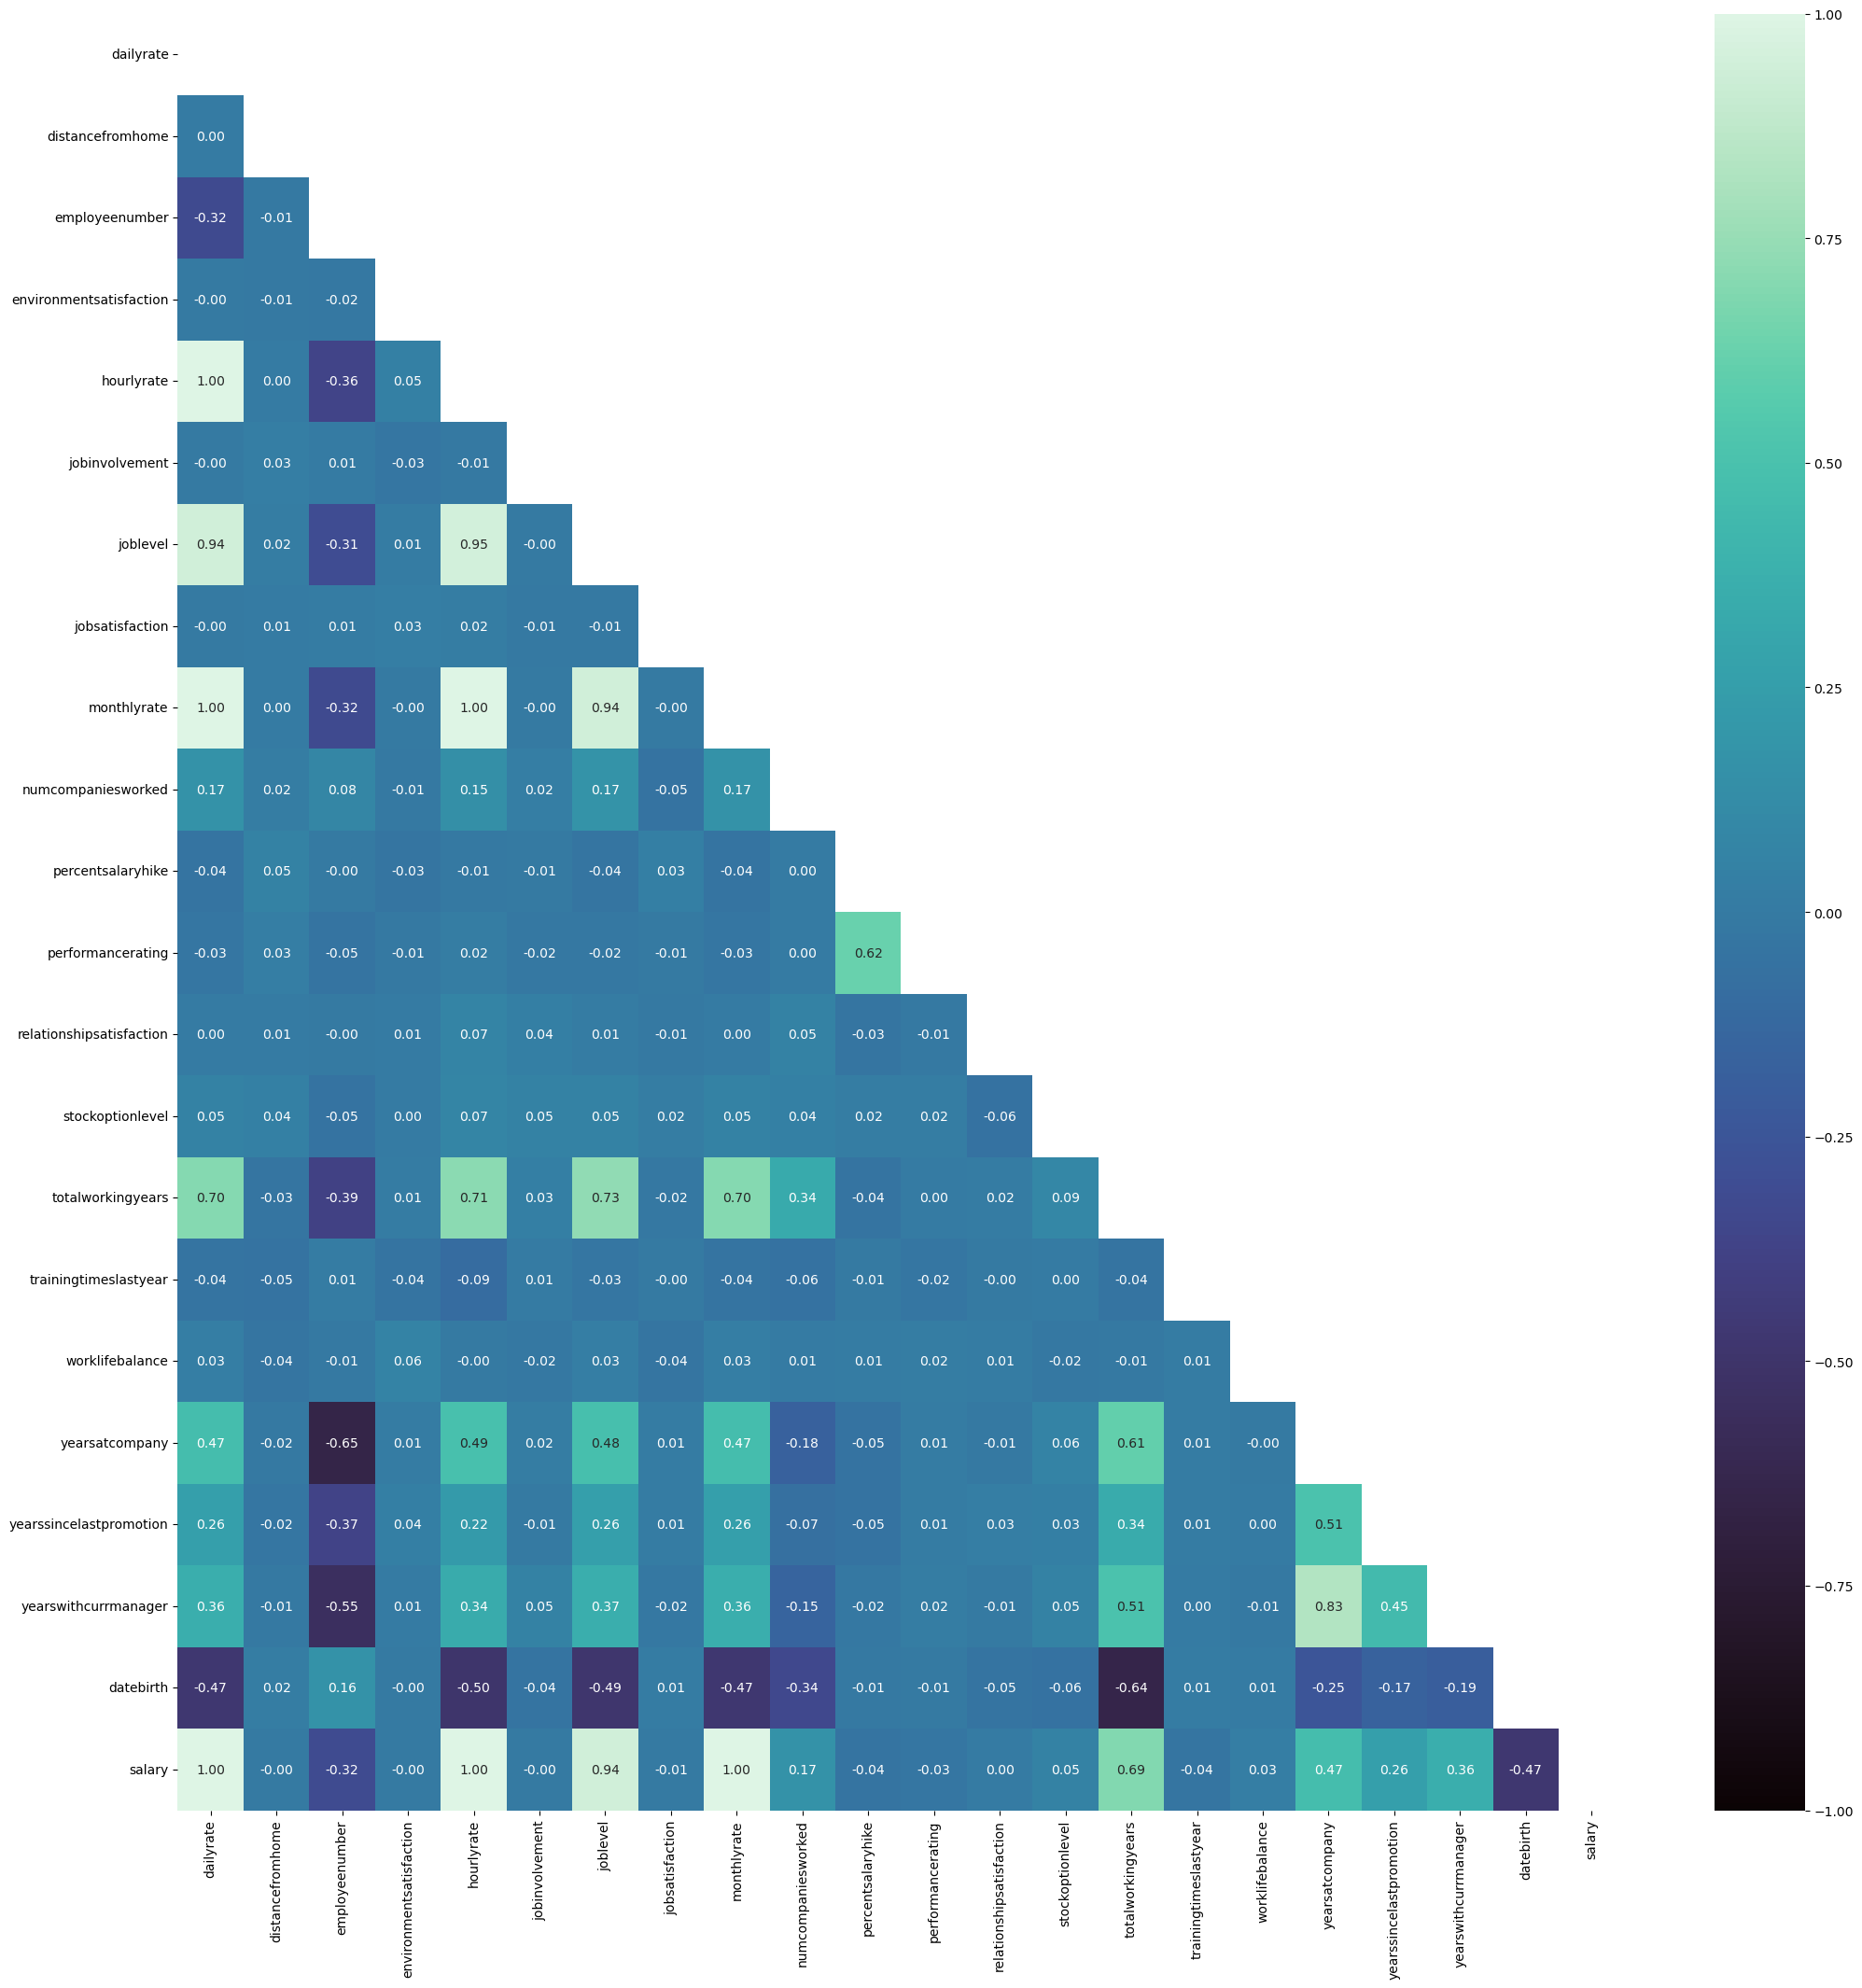

In [7]:
plt.figure(figsize = (25, 25))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1,
            mask=mask);

👩‍💼 Developing the personal profile of the employees

In [8]:
df_profile_all = df[["gender", "maritalstatus", "datebirth", "education"]]
df_profile_all

,gender,maritalstatus,datebirth,education
0,Male,Unknown,1972,Bachelor
1,Male,Unknown,1971,Masters
2,Male,Married,1981,Professional Certification
3,Female,Married,1976,Masters
4,Female,Divorced,1977,Bachelor
...,...,...,...,...
1609,Male,Married,1987,High School or Below
1610,Male,Unknown,1978,Professional Certification
1611,Male,Single,1984,Doctor
1612,Male,Divorced,1987,Masters


In [9]:
df_profile_all.describe().T

,count,mean,std,min,25%,50%,75%,max
datebirth,1614.0,1986.076208,9.101332,1963.0,1980.0,1987.0,1993.0,2005.0


In [10]:
df_profile_all.describe(include="O").T

,count,unique,top,freq
gender,1614,2,Male,971
maritalstatus,1614,4,Unknown,651
education,1614,5,Bachelor,621


In [11]:
gender_percentages = df_profile_all["gender"].value_counts(normalize=True).mul(100).round(2)
gender_percentages

gender
Male      60.16
Female    39.84
Name: proportion, dtype: float64

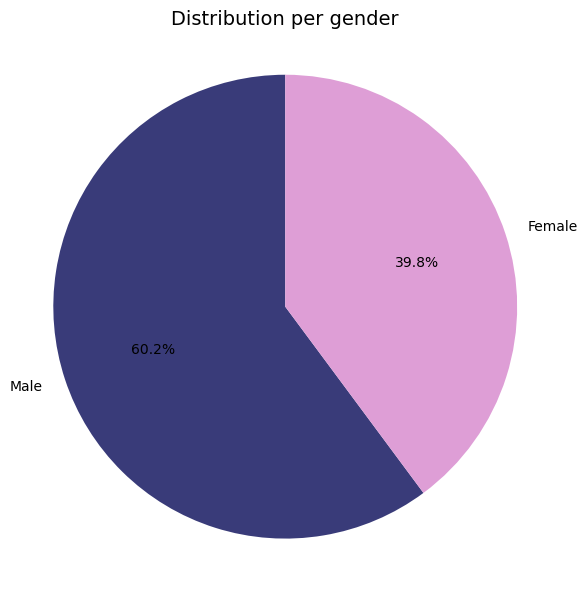

In [12]:
labels = gender_percentages.index
percentages = gender_percentages.values


colormap = cm.get_cmap("tab20b")
colors = colormap(np.linspace(0, 1, len(labels)))


plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 10}
)
plt.title("Distribution per gender", fontsize=14)
plt.axis("equal") 
plt.tight_layout()
plt.show()

In [13]:
df_gen_mar = (df_profile_all[["gender", "maritalstatus"]].value_counts(normalize=True).mul(100)).round(2).reset_index(name="percentage")
df_gen_mar

,gender,maritalstatus,percentage
0,Male,Unknown,24.66
1,Male,Married,15.86
2,Female,Unknown,15.68
3,Male,Single,11.65
4,Female,Married,11.34
5,Female,Single,8.49
6,Male,Divorced,7.99
7,Female,Divorced,4.34


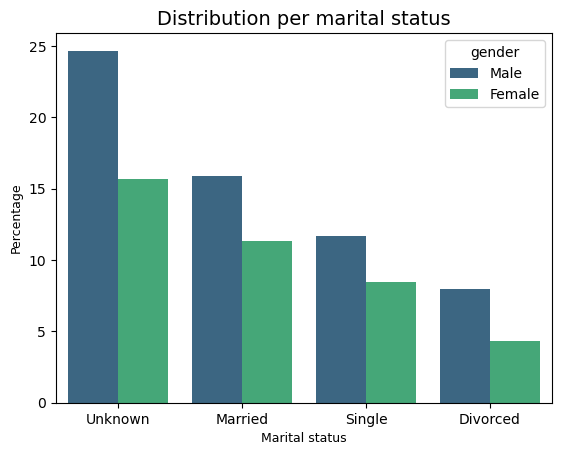

In [14]:
sns.barplot(x = "maritalstatus", 
              y= "percentage",
              data = df_gen_mar, 
              palette = "viridis", 
              hue = "gender")

plt.title("Distribution per marital status", fontsize=14)
plt.xlabel("Marital status", fontsize = 9)
plt.ylabel("Percentage",  fontsize = 9); 

In [15]:
bins = [1900, 1965, 1975, 1985, 1995, 2005, 2015]
labels = ["Above 60","Between 50 and 59", "Between 40 and 49", "Between 30 and 39", "Between 20 and 29", "Below 19"]


df_age = (
    pd.cut(df_profile_all["datebirth"], bins=bins, labels=labels, right=False) 
    .value_counts(normalize=True)  
    .mul(100)  
    .round(2)  
    .reset_index(name="percentage") )
df_age

,datebirth,percentage
0,Between 30 and 39,44.11
1,Between 40 and 49,25.28
2,Between 20 and 29,16.98
3,Between 50 and 59,12.21
4,Above 60,0.93
5,Below 19,0.50


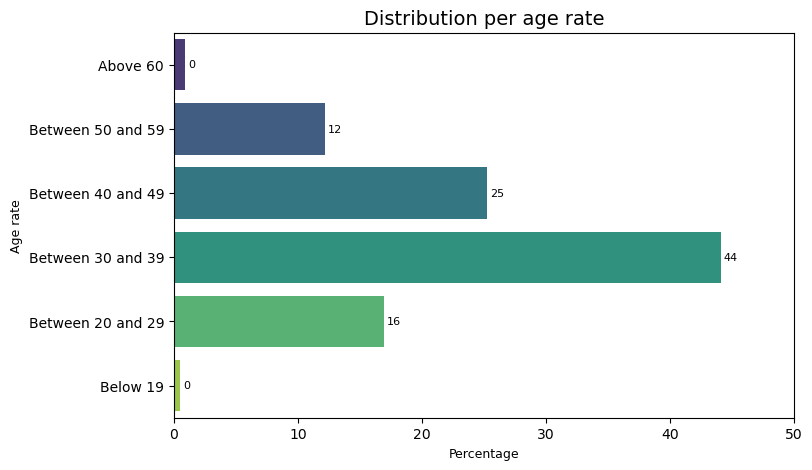

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(y="datebirth", 
            x="percentage", 
            data=df_age, 
            palette="viridis")

plt.title("Distribution per age rate", fontsize = 14)
plt.xlabel("Percentage", fontsize = 9)
plt.ylabel("Age rate", fontsize = 9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2);
plt.xlim(0, 50)
plt.show()

In [17]:
df_gen_edu = df_profile_all[["gender", "education"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_gen_edu

,gender,education,percentage
0,Male,Bachelor,23.05
1,Male,Masters,16.60
2,Female,Bachelor,15.43
3,Male,Professional Certification,11.52
4,Female,Masters,10.97
5,Female,Professional Certification,7.93
6,Male,High School or Below,7.06
7,Female,High School or Below,4.09
8,Male,Doctor,1.92
9,Female,Doctor,1.43


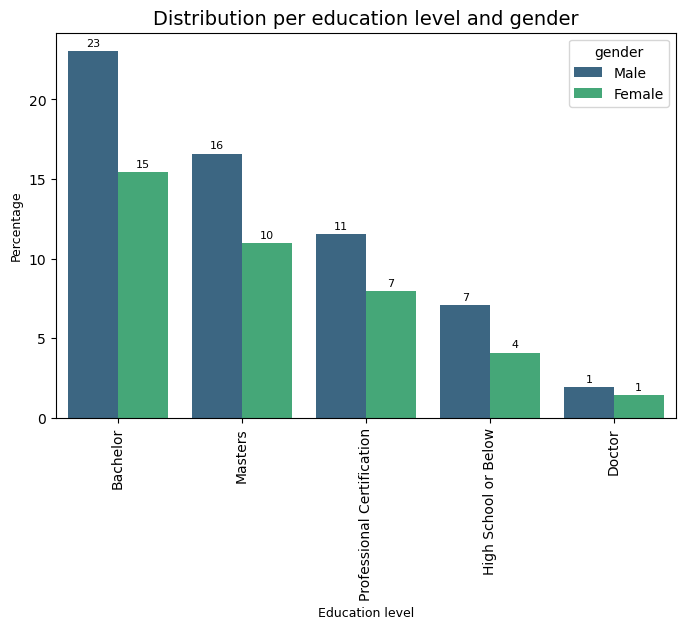

In [18]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(x = "education", 
              y= "percentage",
              data = df_gen_edu, 
              palette = "viridis", 
              hue = "gender")

plt.title("Distribution per education level and gender", fontsize = 14)
plt.xlabel("Education level", fontsize = 9)
plt.ylabel("Percentage",  fontsize = 9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2)
plt.xticks(rotation = 90);

In [19]:
df_edu = df_profile_all[["education"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_edu

,education,percentage
0,Bachelor,38.48
1,Masters,27.57
2,Professional Certification,19.45
3,High School or Below,11.15
4,Doctor,3.35


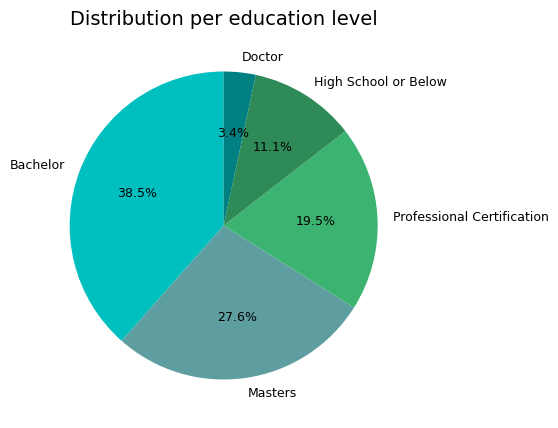

In [20]:
colors = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.figure(figsize=(8, 5))

plt.pie("percentage", labels= "education",
        data = df_edu, 
        autopct=  "%1.1f%%", 
        colors = colors, 
        textprops={"fontsize": 9}, 
        startangle=90);
plt.title("Distribution per education level", fontsize= 14);


In [21]:
df_edu_field = df[["educationfield"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_edu_field

,educationfield,percentage
0,Life Sciences,40.16
1,Medical,31.76
2,Marketing,11.97
3,Technical Degree,7.94
4,Other,6.79
5,Human Resources,1.38


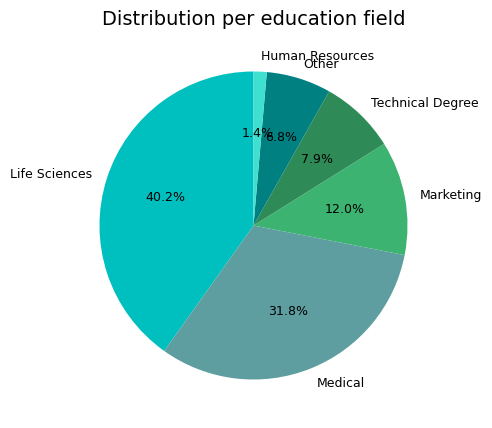

In [22]:
plt.figure(figsize=(8, 5))

plt.pie("percentage", labels= "educationfield",
        data = df_edu_field, 
        autopct=  "%1.1f%%", 
        colors = colors, 
        textprops={"fontsize": 9}, 
        startangle=90);
plt.title("Distribution per education field", fontsize= 14);

In [23]:
df_edu_field_level = df[["educationfield", "education"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_edu_field_level

,educationfield,education,percentage
0,Life Sciences,Bachelor,14.50
1,Medical,Bachelor,12.77
2,Life Sciences,Masters,12.77
3,Life Sciences,Professional Certification,7.36
4,Medical,Professional Certification,7.25
5,Medical,Masters,7.02
6,Life Sciences,High School or Below,4.60
7,Marketing,Bachelor,4.49
8,Medical,High School or Below,4.03
9,Marketing,Masters,3.80


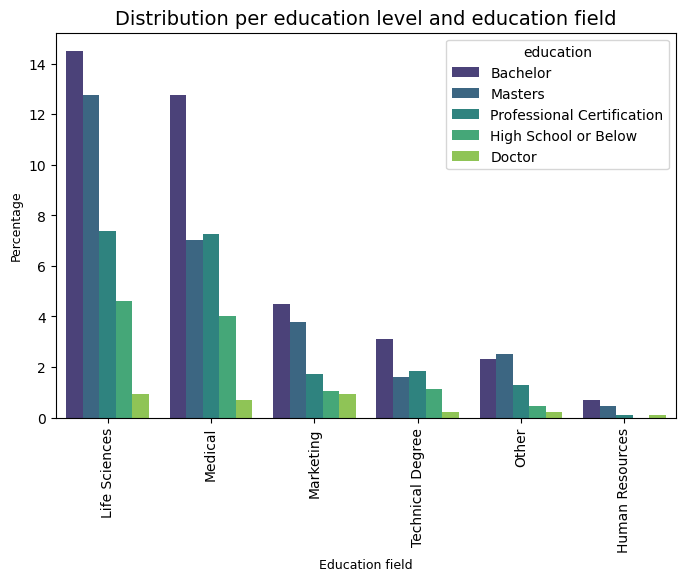

In [24]:
plt.figure(figsize=(8, 5))

sns.barplot(x = "educationfield", 
              y= "percentage",
              data = df_edu_field_level, 
              palette = "viridis", 
              hue = "education")

# cambiamos el nombre de los ejes usando los métodos "plt.ylabel()" y "plt.xlabel()"
plt.title("Distribution per education level and education field", fontsize = 14)
plt.xticks(rotation = 90)
plt.xlabel("Education field", fontsize = 9)
plt.ylabel("Percentage",  fontsize = 9);

👩‍🔬 Developing the professional profile of the employees

In [25]:
df["salarylevel"] = pd.cut(df["salary"], bins =3, labels= ["low", "medium", "high"])
df_sort = df[["jobrole", "education", "salary", "salarylevel"]].sort_values(by="salarylevel", ascending=False)

In [26]:
df_sort.head(10)

,jobrole,education,salary,salarylevel
0,Research director,Bachelor,195370.00,high
893,Research director,Professional Certification,194060.00,high
1012,Manager,Bachelor,153407.07,high
1009,Manager,Masters,191324.62,high
166,Manager,Bachelor,153407.07,high
990,Research director,Masters,191324.62,high
169,Manager,Masters,191324.62,high
933,Sales executive,Bachelor,137700.00,high
174,Manager,Masters,154270.00,high
921,Manager,Masters,195129.96,high


In [27]:
df_sort["salarylevel"].value_counts()

salarylevel
low       1172
medium     269
high       173
Name: count, dtype: int64

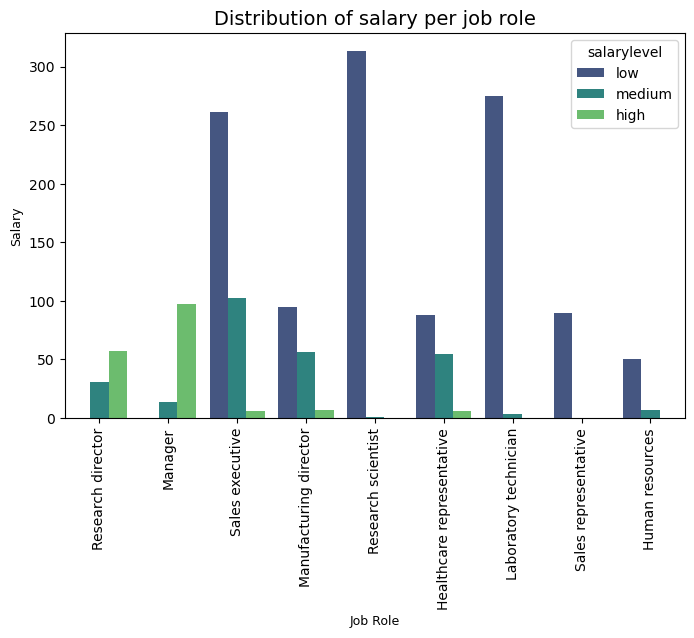

In [28]:
plt.figure(figsize=(8, 5))

sns.countplot(x = "jobrole", 
              data = df, 
              palette = "viridis", 
              hue = "salarylevel")

plt.title("Distribution of salary per job role", fontsize = 14)
plt.xticks(rotation = 90)
plt.xlabel("Job Role", fontsize = 9)
plt.ylabel("Salary",  fontsize = 9); 

In [29]:
df_sort[["jobrole","salarylevel"]].value_counts(ascending=False, dropna=False).reset_index().sort_values(by="salarylevel")

,jobrole,salarylevel,count
0,Research scientist,low,313
1,Laboratory technician,low,275
2,Sales executive,low,261
5,Manufacturing director,low,95
6,Sales representative,low,90
7,Healthcare representative,low,88
11,Human resources,low,50
15,Human resources,medium,7
13,Manager,medium,14
12,Research director,medium,31


In [30]:
df_edu_salary = df.groupby("education")["salary"].mean().round(2).reset_index(name="Average salary")

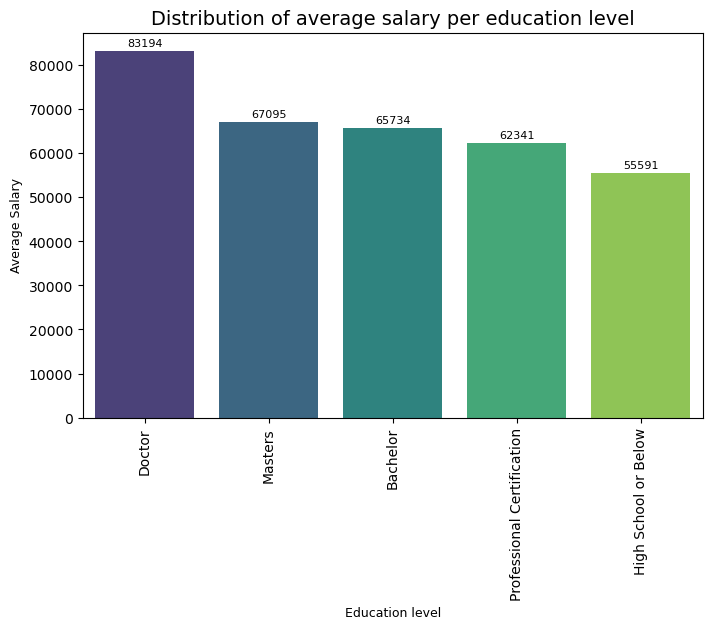

In [31]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(data= df_edu_salary,
            x="education",
            y="Average salary",
            palette = "viridis",
            order=["Doctor", "Masters", "Bachelor", "Professional Certification", "High School or Below"] )

plt.title("Distribution of average salary per education level", fontsize = 14)
plt.xticks(rotation = 90)
plt.xlabel("Education level", fontsize = 9)
plt.ylabel("Average Salary",  fontsize = 9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2);

In [32]:
df_work_prof = df[["gender", "department", "jobrole", "yearsatcompany", "yearsincurrentrole", "salarylevel","salary"]]
df_work_prof.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              1614 non-null   object  
 1   department          1614 non-null   object  
 2   jobrole             1614 non-null   object  
 3   yearsatcompany      1614 non-null   int64   
 4   yearsincurrentrole  34 non-null     object  
 5   salarylevel         1614 non-null   category
 6   salary              1614 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 90.0+ KB


In [33]:
df_dept_gend =df_work_prof[["gender", "department"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_dept_gend

,gender,department,percentage
0,Male,Research & Development,37.67
1,Female,Research & Development,24.35
2,Male,Sales,16.85
3,Female,Sales,11.90
4,Male,Unknown,3.10
5,Female,Unknown,2.54
6,Male,Human Resources,2.54
7,Female,Human Resources,1.05


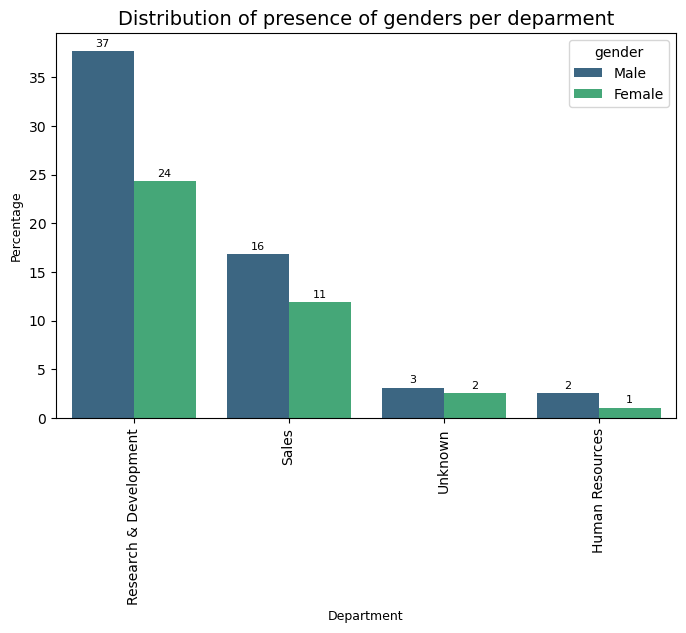

In [34]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(data= df_dept_gend,
            x="department",
            y="percentage",
            palette = "viridis",
            hue = "gender" )

plt.title("Distribution of presence of genders per deparment", fontsize = 14)
plt.xticks(rotation = 90)
plt.xlabel("Department", fontsize = 9)
plt.ylabel("Percentage",  fontsize = 9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=2);

In [35]:
df_job_gend =df_work_prof[["gender", "jobrole"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)
df_job_gend

,gender,jobrole,percentage
0,Male,Sales executive,13.63
1,Male,Research scientist,12.02
2,Male,Laboratory technician,11.52
3,Female,Sales executive,9.23
4,Female,Research scientist,7.43
5,Female,Laboratory technician,5.70
6,Male,Healthcare representative,5.39
7,Female,Manufacturing director,4.89
8,Male,Manufacturing director,4.89
10,Female,Healthcare representative,3.84


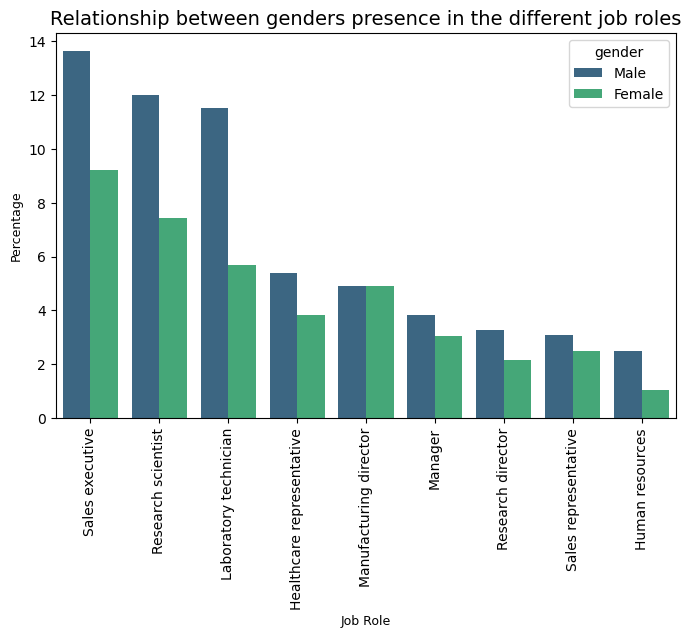

In [36]:
plt.figure(figsize=(8, 5))

sns.barplot(data= df_job_gend,
            x="jobrole",
            y="percentage",
            palette = "viridis",
            hue = "gender")

plt.xticks(rotation = 90)
plt.xlabel("Job Role", fontsize = 9)
plt.ylabel("Percentage",  fontsize = 9)
plt.title("Relationship between genders presence in the different job roles", fontsize= 14);

In [37]:
df_salary_job= df_work_prof[["gender", "salarylevel", "jobrole"]].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage").sort_values(by="percentage", ascending=False)

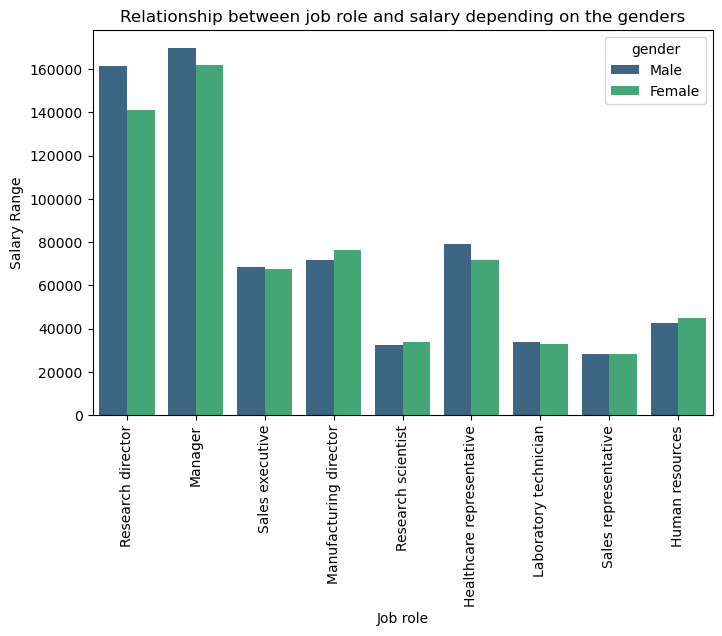

In [38]:
plt.figure(figsize=(8, 5))

sns.barplot(data = df,
            x = "jobrole", 
            y = "salary", 
            hue="gender",
            errorbar=None,
            palette= "viridis")


plt.xticks(rotation = 90)
plt.xlabel("Job role")
plt.ylabel("Salary Range")
plt.title("Relationship between job role and salary depending on the genders");

🧑‍💻 Analysis of Retentions and Departures, and the Underlying Reasons

In [39]:
df_att = df[["gender", "jobrole", "department", "attrition", "salary", "salarylevel", "percentsalaryhike", "yearsatcompany", "yearswithcurrmanager", "yearssincelastpromotion", "performancerating", "relationshipsatisfaction", "worklifebalance", "jobsatisfaction"]]

In [40]:
df_att_y = df_att[df_att["attrition"]=="Yes"]
df_att_n = df_att[df_att["attrition"]=="No"]

In [41]:
df_att_y.head(1)

,gender,jobrole,department,attrition,salary,salarylevel,percentsalaryhike,yearsatcompany,yearswithcurrmanager,yearssincelastpromotion,performancerating,relationshipsatisfaction,worklifebalance,jobsatisfaction
13,Female,Research director,Research & Development,Yes,195450.0,high,12,22,8,15,3.0,4,3.0,3


In [42]:
df_pie_att = df_att.groupby("attrition")["attrition"].count().reset_index(name="count")

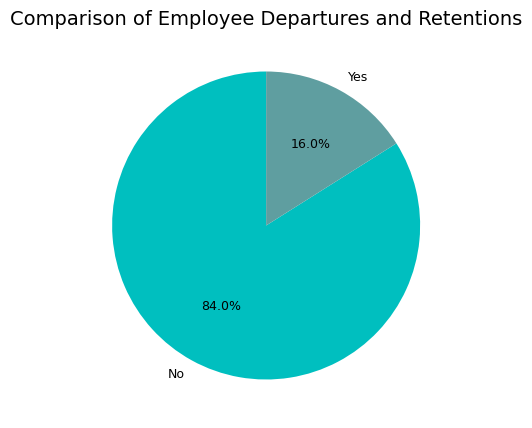

In [43]:
plt.figure(figsize=(8, 5))

plt.pie("count", labels= "attrition",
        data = df_pie_att, 
        autopct=  "%1.1f%%", 
        colors = colors, 
        textprops={"fontsize": 9}, 
        startangle=90);
plt.title("Comparison of Employee Departures and Retentions", fontsize = 14);

In [44]:
df_pie_gender_y= df_att_y.groupby("gender")["gender"].count().reset_index(name="count")

In [45]:
df_pie_gender_n= df_att_n.groupby("gender")["gender"].count().reset_index(name="count")

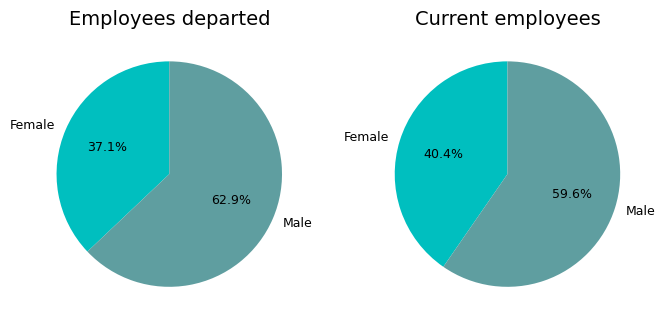

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

axes[0].pie(
    df_pie_gender_y["count"], 
    labels=df_pie_gender_y["gender"],
    autopct="%1.1f%%", 
    colors=colors, 
    textprops={"fontsize": 9}, 
    startangle=90
)
axes[0].set_title("Employees departed", fontsize = 14)

axes[1].pie(
    df_pie_gender_n["count"], 
    labels=df_pie_gender_n["gender"],
    autopct="%1.1f%%", 
    colors=colors, 
    textprops={"fontsize": 9}, 
    startangle=90
)
axes[1].set_title("Current employees", fontsize = 14)

plt.show()  # <- Asegúrate de tener esto


In [47]:
df_att_y["jobrole"].value_counts().reset_index()
df_att_n["jobrole"].value_counts().reset_index()

,jobrole,count
0,Sales executive,304
1,Research scientist,262
2,Laboratory technician,212
3,Manufacturing director,148
4,Healthcare representative,138
5,Manager,105
6,Research director,86
7,Sales representative,56
8,Human resources,44


In [48]:
# Contar empleados que se fueron y que siguen por job role
df_y_grouped = df_att_y["jobrole"].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage")
df_y_grouped.columns = ["jobrole", "percentage"]

df_n_grouped = df_att_n["jobrole"].value_counts(normalize=True).mul(100).round(2).reset_index(name="percentage")
df_n_grouped.columns = ["jobrole", "percentage"]


NameError: name 'hue_order' is not defined

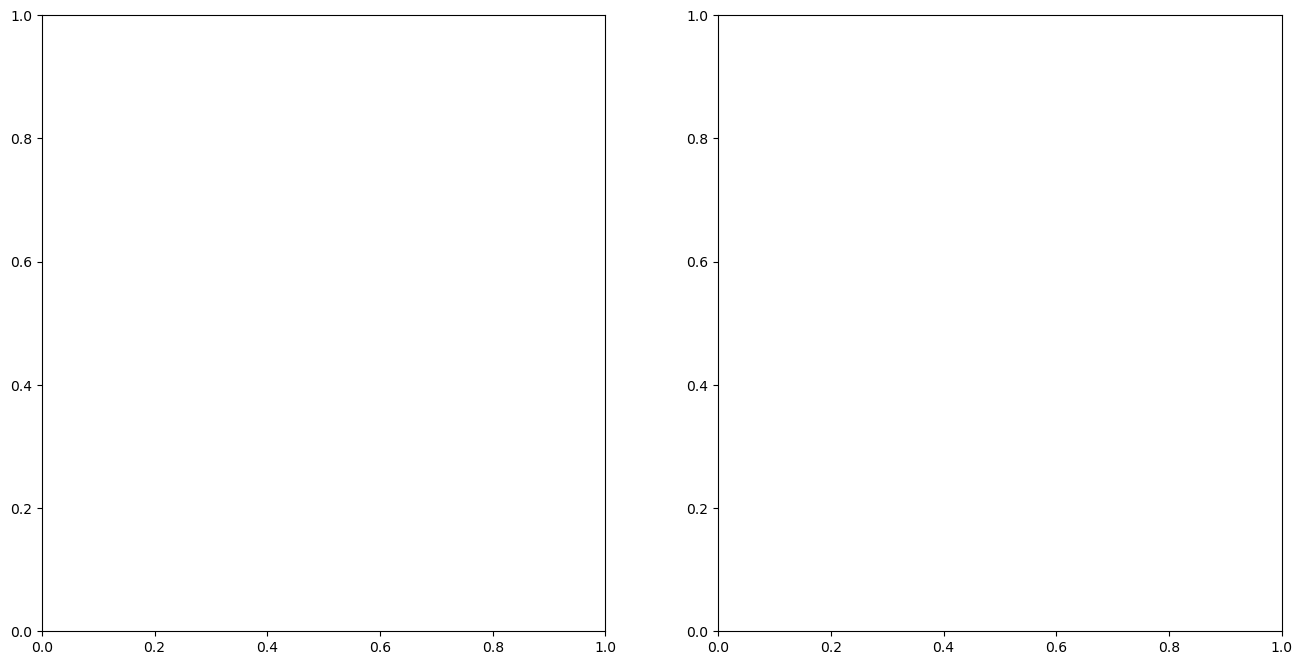

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.barplot(
    data=df_y_grouped,
    x="jobrole",
    y="percentage",
    order=hue_order,
    palette=palette_dict,
    ax=axes[0]
)
axes[0].tick_params(axis="x", labelrotation=90)
axes[0].set_title("Employees that left by job role", fontsize = 14)
axes[0].set_xlabel("Job role", fontsize = 9)
axes[0].set_ylabel("Percentage", fontsize = 9)

# Gráfico 2 - empleados actuales
sns.barplot(
    data=df_n_grouped,
    x="jobrole",
    y="percentage",
    order=hue_order,
    palette=palette_dict,
    ax=axes[1]
)
axes[1].tick_params(axis="x", labelrotation=90)
axes[1].set_title("Employees currently working by job role", fontsize = 14)
axes[1].set_xlabel("Job role", fontsize = 9)
axes[1].set_ylabel("Percentage", fontsize = 9)
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


''

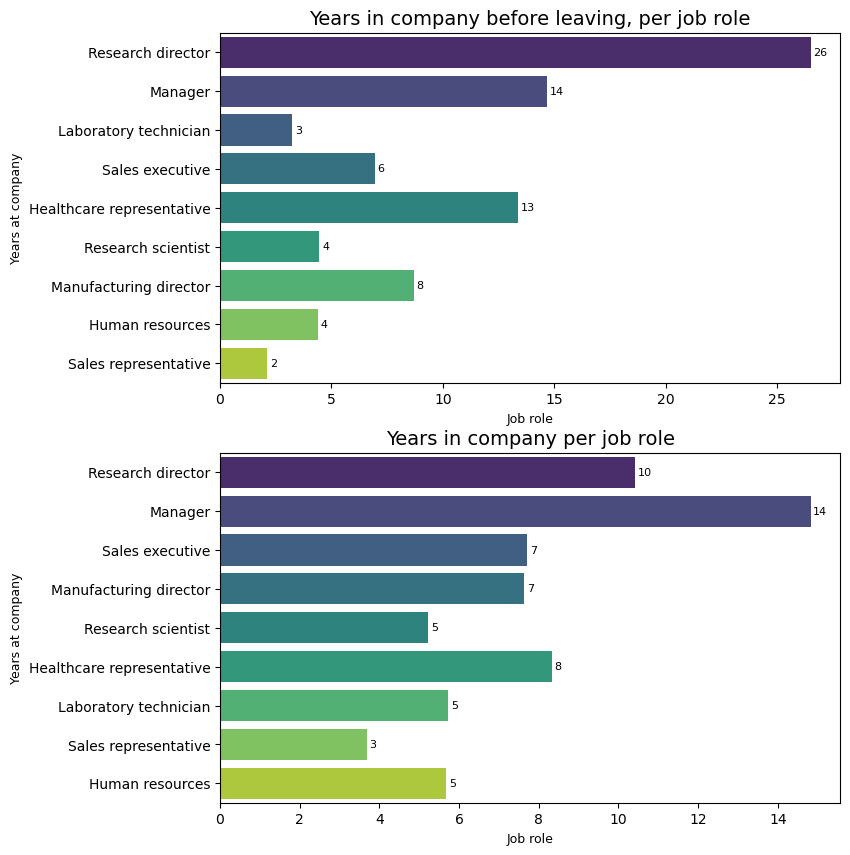

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.barplot(x = "yearsatcompany", 
                y = "jobrole", 
                data = df_att_y,
                palette="viridis",
                errorbar=None,
                ax = axes[0])

axes[0].set_title("Years in company before leaving, per job role", fontsize = 14)
axes[0].set_xlabel("Job role", fontsize = 9)
axes[0].set_ylabel("Years at company", fontsize = 9)


sns.barplot(x = "yearsatcompany", 
                y = "jobrole", 
                data = df_att_n,
                palette="viridis",
                errorbar=None,
                ax = axes[1])

axes[1].set_title("Years in company per job role", fontsize = 14)
axes[1].set_xlabel("Job role", fontsize = 9)
axes[1].set_ylabel("Years at company", fontsize = 9)
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2)

;

''

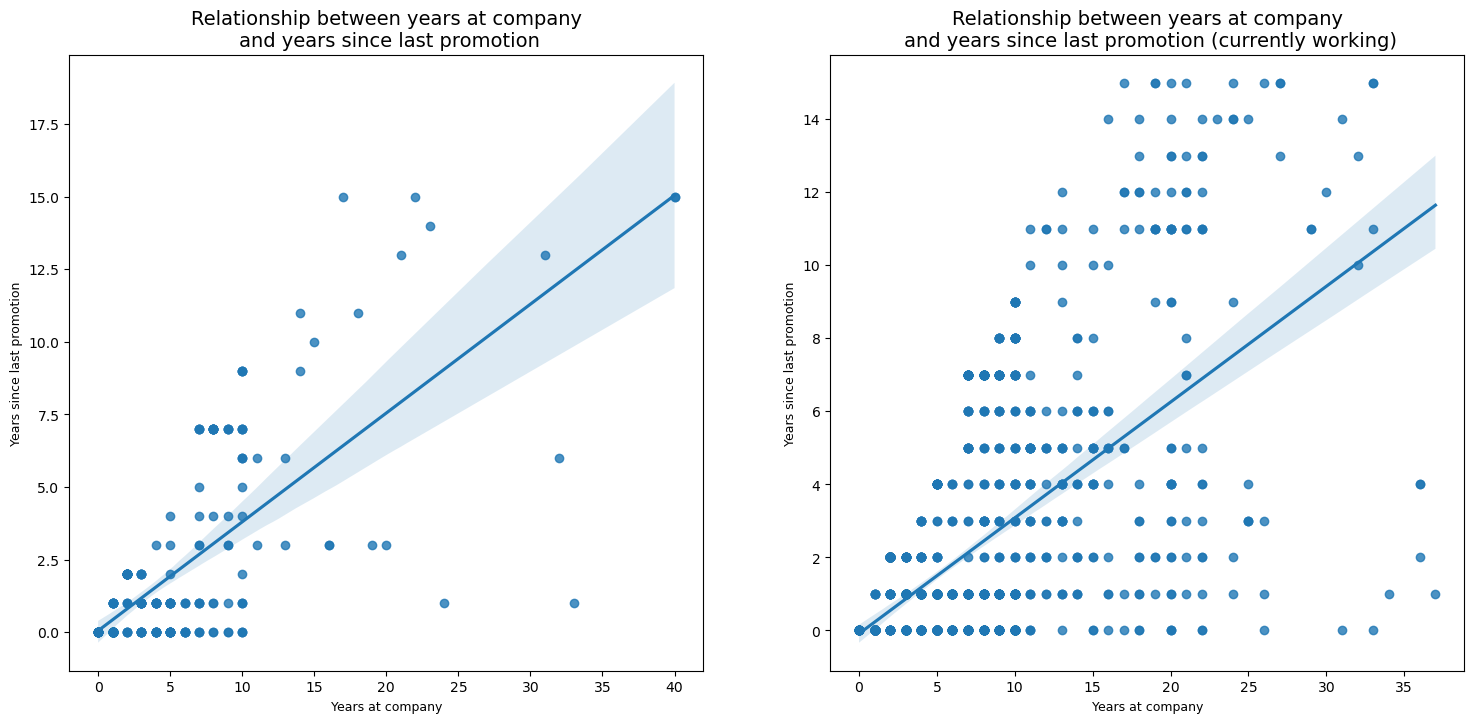

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))


sns.regplot(x = "yearsatcompany", 
                y = "yearssincelastpromotion", 
                data = df_att_y,
                ax = axes[0]
                )

axes[0].set_title("Relationship between years at company\n and years since last promotion", fontsize = 14)
axes[0].set_xlabel("Years at company", fontsize = 9)
axes[0].set_ylabel("Years since last promotion", fontsize = 9)

sns.regplot(x = "yearsatcompany", 
                y = "yearssincelastpromotion", 
                data = df_att_n,
                ax = axes[1])

axes[1].set_title("Relationship between years at company\n and years since last promotion (currently working)", fontsize = 14)
axes[1].set_xlabel("Years at company", fontsize = 9)
axes[1].set_ylabel("Years since last promotion", fontsize = 9)
;

In [ ]:
bins = list(range(0, df_att_y["yearsatcompany"].max() + 6, 5))
labels = [f'{i}-{i+4}' for i in range(0, df_att_y["yearsatcompany"].max() + 1, 5)]

if bins[-1] > df_att_y["yearsatcompany"].max():
    labels[-1] = f'{bins[-2]}-{df_att_y["yearsatcompany"].max()}'
elif bins[-1] == df_att_y["yearsatcompany"].max():
    labels[-1] = f'{bins[-2]}-{bins[-1]}'

df_att_y['years_at_company_range'] = pd.cut(df_att_y['yearsatcompany'], bins=bins, labels=labels, right=True, include_lowest=True)



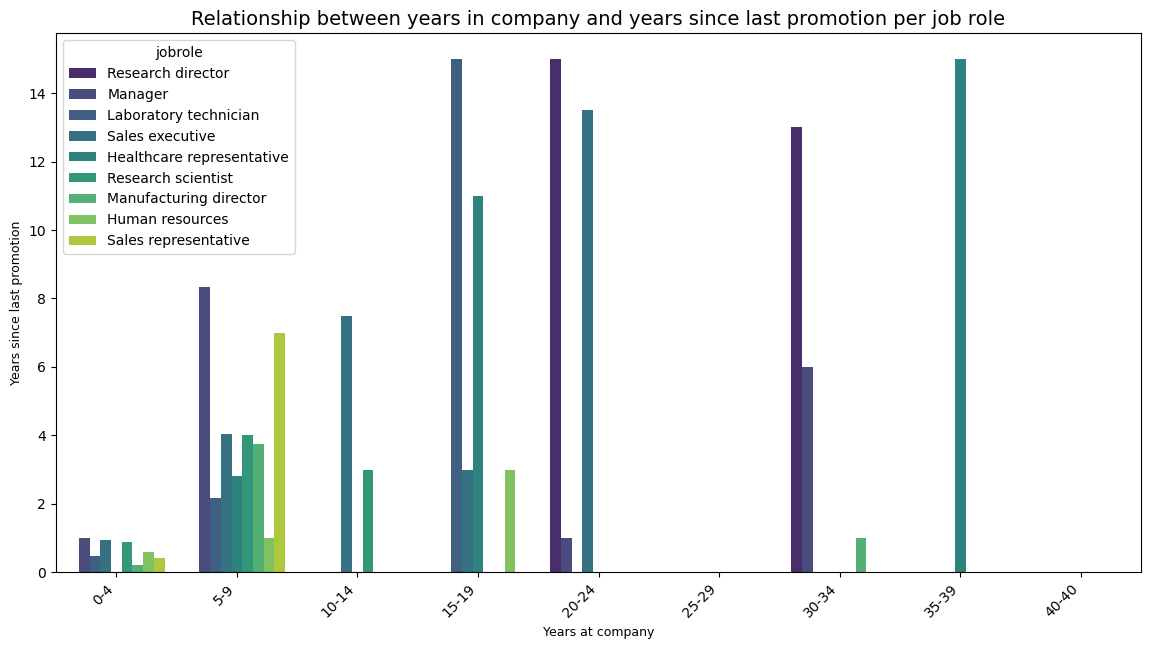

In [ ]:

plt.figure(figsize=(14, 7))

sns.barplot(data = df_att_y,
            x = "years_at_company_range", 
            y = "yearssincelastpromotion", 
            hue="jobrole",
            errorbar=None,
            palette= "viridis",
            dodge=True)


plt.xticks(rotation=45, ha='right')

plt.xlabel("Years at company",fontsize = 9)
plt.ylabel("Years since last promotion", fontsize = 9)

plt.title("Relationship between years in company and years since last promotion per job role", fontsize = 14);

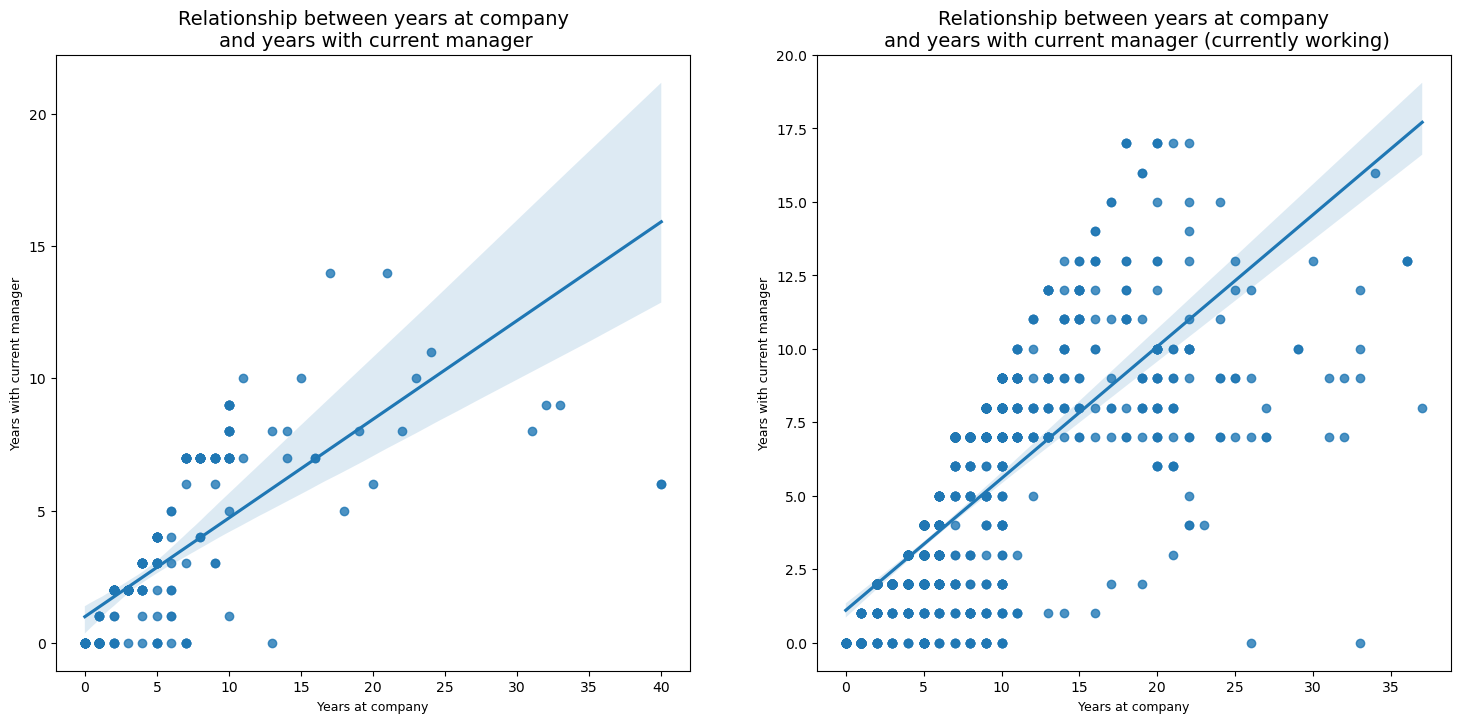

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))


sns.regplot(x = "yearsatcompany", 
                y = "yearswithcurrmanager", 
                data = df_att_y,
                ax = axes[0])

axes[0].set_title("Relationship between years at company\n and years with current manager", fontsize = 14)
axes[0].set_xlabel("Years at company", fontsize = 9)
axes[0].set_ylabel("Years with current manager", fontsize = 9)

sns.regplot(x = "yearsatcompany", 
                y = "yearswithcurrmanager", 
                data = df_att_n,
                ax = axes[1])

axes[1].set_title("Relationship between years at company\n and years with current manager (currently working)", fontsize = 14)
axes[1].set_xlabel("Years at company", fontsize = 9)
axes[1].set_ylabel("Years with current manager", fontsize = 9);

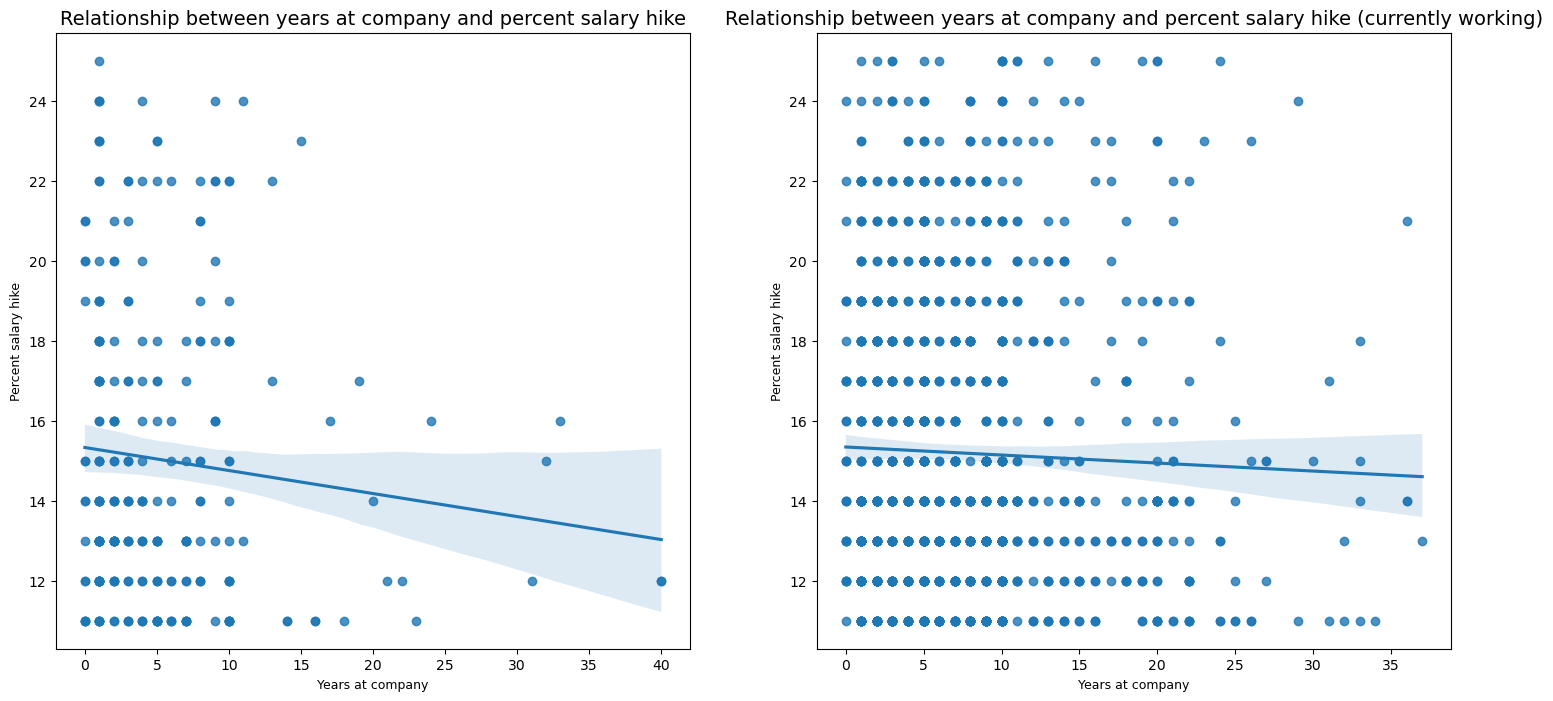

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))


sns.regplot(x = "yearsatcompany", 
                y = "percentsalaryhike", 
                data = df_att_y,
                ax = axes[0])

axes[0].set_title("Relationship between years at company and percent salary hike", fontsize = 14)
axes[0].set_xlabel("Years at company", fontsize = 9)
axes[0].set_ylabel("Percent salary hike", fontsize = 9)

sns.regplot(x = "yearsatcompany", 
                y = "percentsalaryhike", 
                data = df_att_n,
                ax = axes[1])

axes[1].set_title("Relationship between years at company and percent salary hike (currently working)", fontsize = 14)
axes[1].set_xlabel("Years at company", fontsize = 9)
axes[1].set_ylabel("Percent salary hike", fontsize = 9);


👍 Other satisfaction markers

''

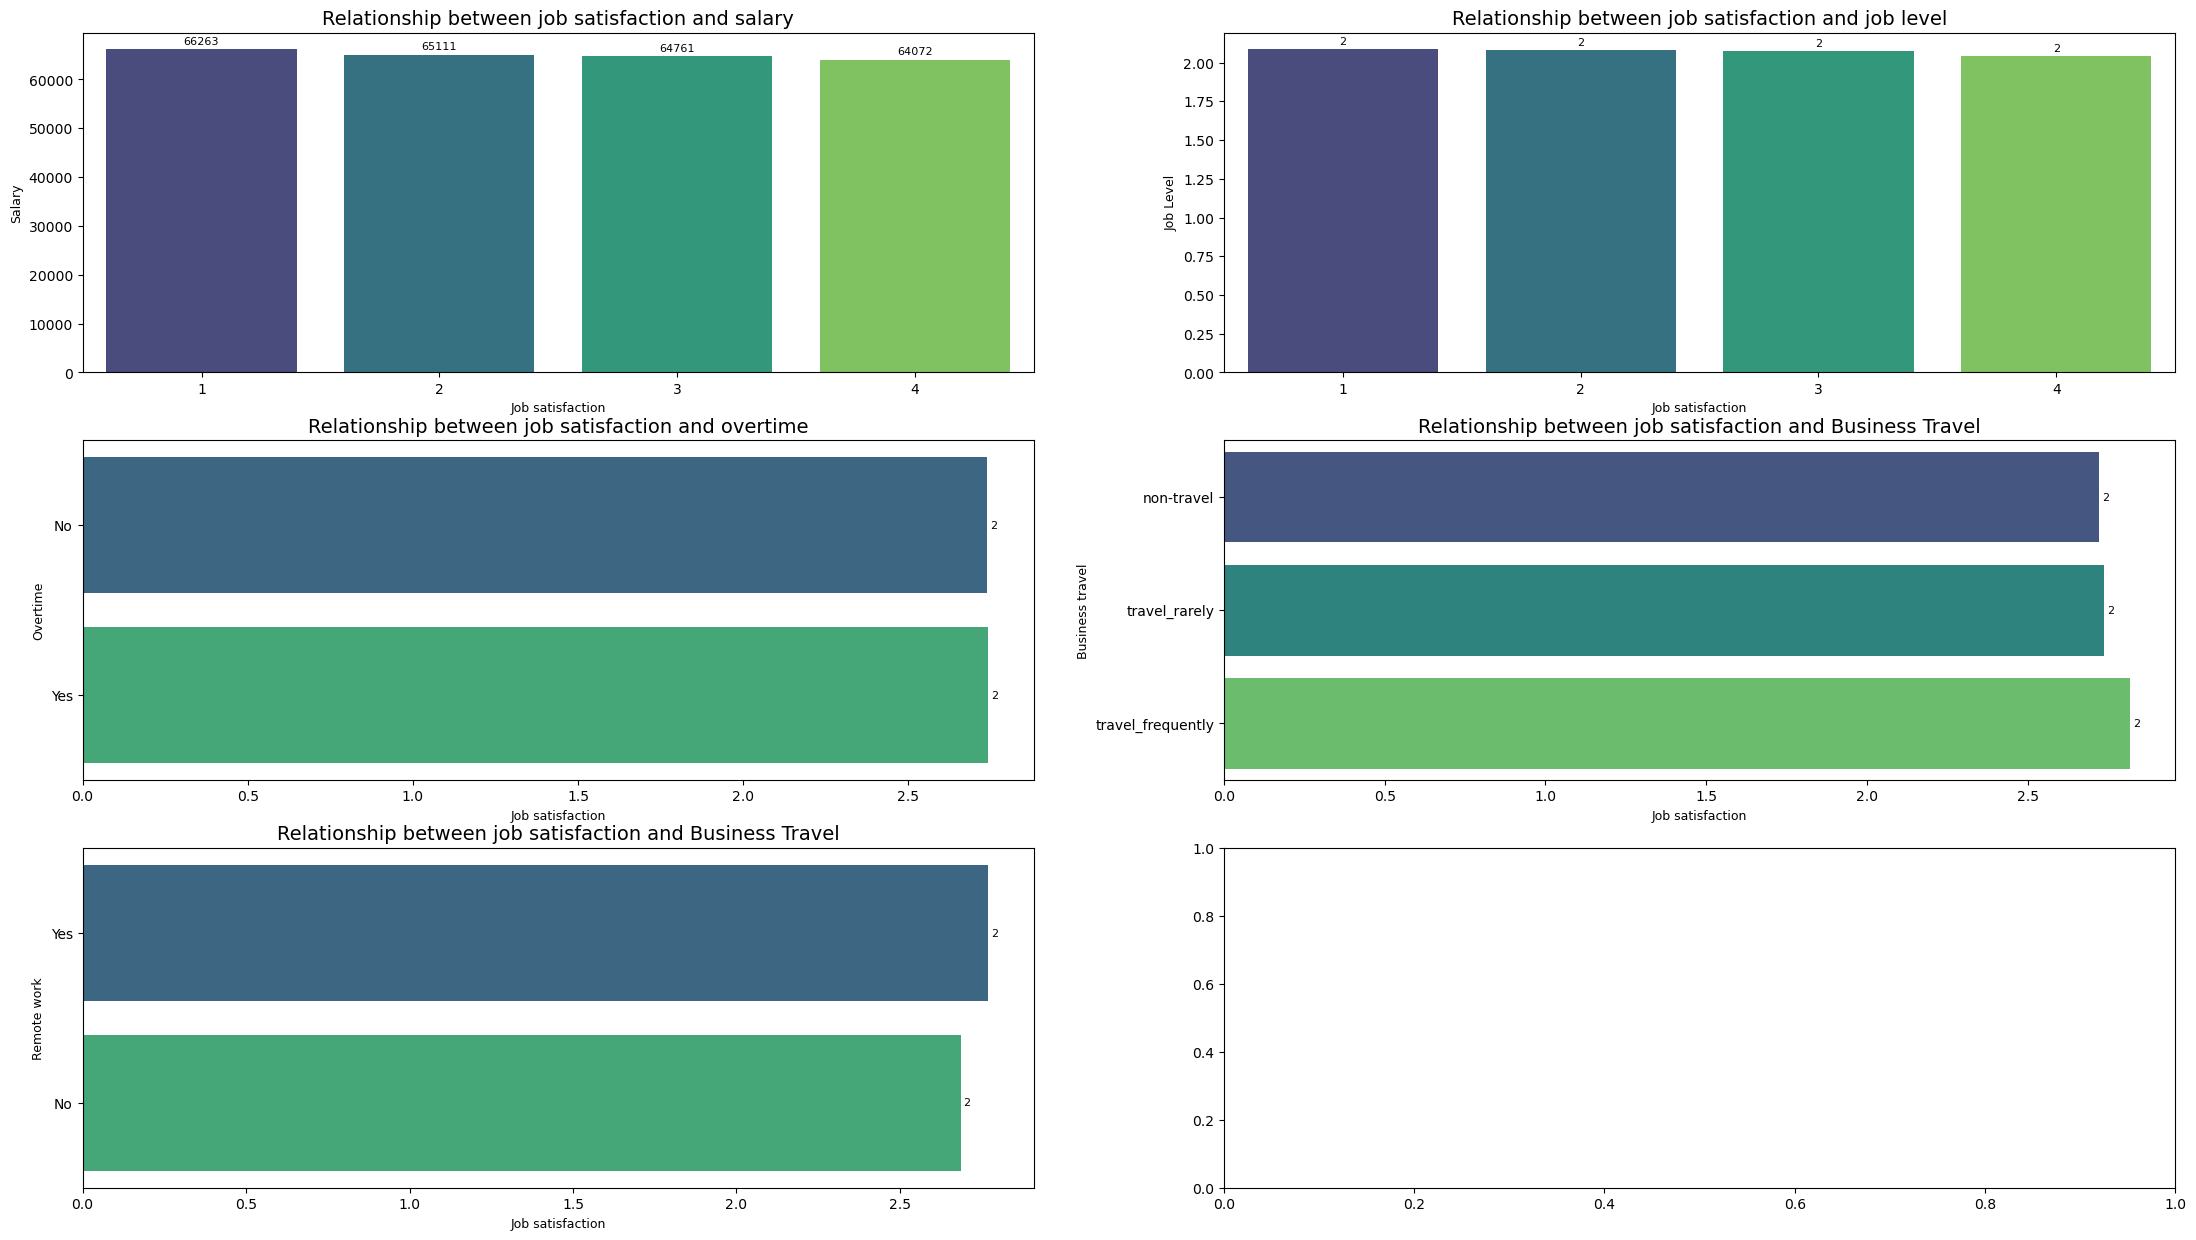

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(27, 15))

sns.barplot(x = "jobsatisfaction", 
            y = "salary", 
            data = df, 
            errorbar=None,
            palette="viridis", 
            ax=axes[0,0])

axes[0,0].set_xlabel("Job satisfaction", fontsize = 9)
axes[0,0].set_ylabel("Salary", fontsize = 9)

axes[0,0].set_title("Relationship between job satisfaction and salary", fontsize = 14)

sns.barplot(x = "jobsatisfaction", 
            y = "joblevel", 
            data = df,  
            errorbar=None,
            palette="viridis",  
            ax=axes[0,1])

axes[0,1].set_xlabel("Job satisfaction", fontsize = 9)
axes[0,1].set_ylabel("Job Level", fontsize = 9)
axes[0,1].set_title("Relationship between job satisfaction and job level", fontsize = 14)


sns.barplot(x = "jobsatisfaction", 
            y = "overtime", 
            data = df,  
            errorbar=None, 
            palette="viridis", 
            ax=axes[1,0])

axes[1,0].set_xlabel("Job satisfaction", fontsize = 9)
axes[1,0].set_ylabel("Overtime", fontsize = 9)
axes[1,0].set_title("Relationship between job satisfaction and overtime",  fontsize = 14)


sns.barplot(x = "jobsatisfaction", 
            y = "businesstravel", 
            data = df,  
            errorbar=None, 
            palette="viridis", 
            ax=axes[1,1])

axes[1,1].set_xlabel("Job satisfaction", fontsize = 9)
axes[1,1].set_ylabel("Business travel", fontsize = 9)
axes[1,1].set_title("Relationship between job satisfaction and Business Travel", fontsize = 14)

sns.barplot(x = "jobsatisfaction", 
            y = "remotework", 
            data = df,  
            errorbar=None,
            palette="viridis",  
            ax=axes[2,0])

axes[2,0].set_xlabel("Job satisfaction", fontsize = 9)
axes[2,0].set_ylabel("Remote work", fontsize = 9)
axes[2,0].set_title("Relationship between job satisfaction and Business Travel", fontsize = 14)

for ax in axes.flatten():  
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2)
;


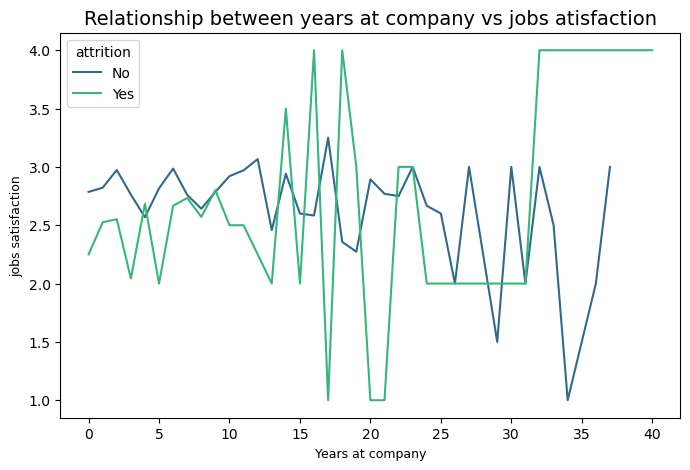

In [ ]:
plt.figure(figsize=(8, 5))


sns.lineplot(x = "yearsatcompany", 
                y = "jobsatisfaction", 
                palette= "viridis",
                data = df_att,
                errorbar=None,
                hue= "attrition")

plt.title("Relationship between years at company vs jobs atisfaction", fontsize = 14)
plt.xlabel("Years at company", fontsize = 9)
plt.ylabel("jobs satisfaction", fontsize = 9);



''

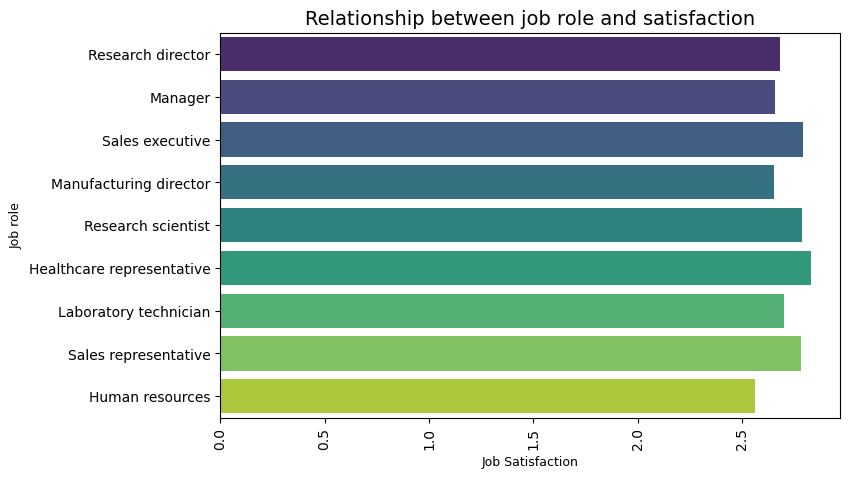

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.barplot(data = df_att,
            x = "jobsatisfaction", 
            y = "jobrole", 
            errorbar=None,
            palette= "viridis")


plt.xticks(rotation = 90)
plt.xlabel("Job Satisfaction", fontsize = 9)
plt.ylabel("Job role", fontsize = 9)
plt.title("Relationship between job role and satisfaction", fontsize = 14)
;

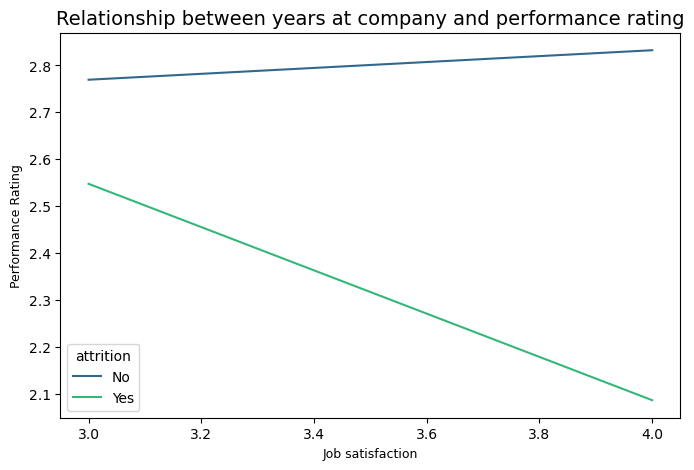

In [ ]:
plt.figure(figsize=(8, 5))

sns.lineplot(x = "performancerating", 
                y = "jobsatisfaction", 
                data = df_att,
                palette= "viridis",
                errorbar=None,
                hue= "attrition")

plt.title("Relationship between years at company and performance rating", fontsize= 14)
plt.xlabel("Job satisfaction", fontsize= 9)
plt.ylabel("Performance Rating", fontsize= 9);


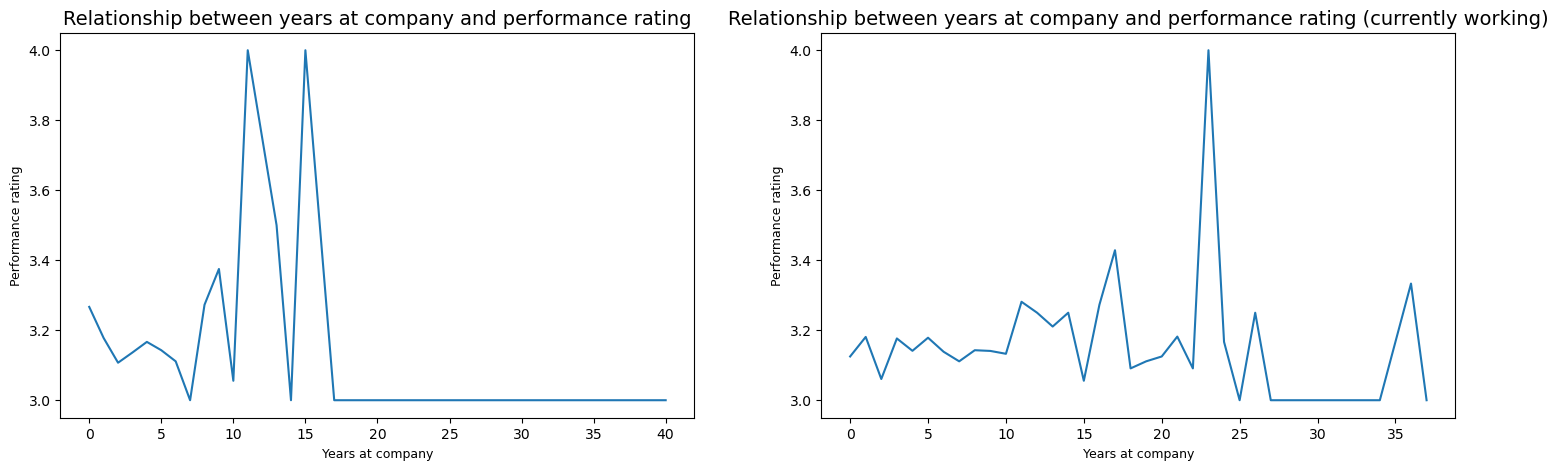

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))


sns.lineplot(x = "yearsatcompany", 
                y = "performancerating", 
                data = df_att_y,
                errorbar=None,
                palette= "viridis",
                ax = axes[0])

axes[0].set_title("Relationship between years at company and performance rating", fontsize= 14)
axes[0].set_xlabel("Years at company", fontsize= 9)
axes[0].set_ylabel("Performance rating", fontsize= 9)

sns.lineplot(x = "yearsatcompany", 
                y = "performancerating", 
                data = df_att_n,
                errorbar=None,
                palette= "viridis",
                ax = axes[1])

axes[1].set_title("Relationship between years at company and performance rating (currently working)", fontsize= 14)
axes[1].set_xlabel("Years at company", fontsize= 9)
axes[1].set_ylabel("Performance rating", fontsize= 9);

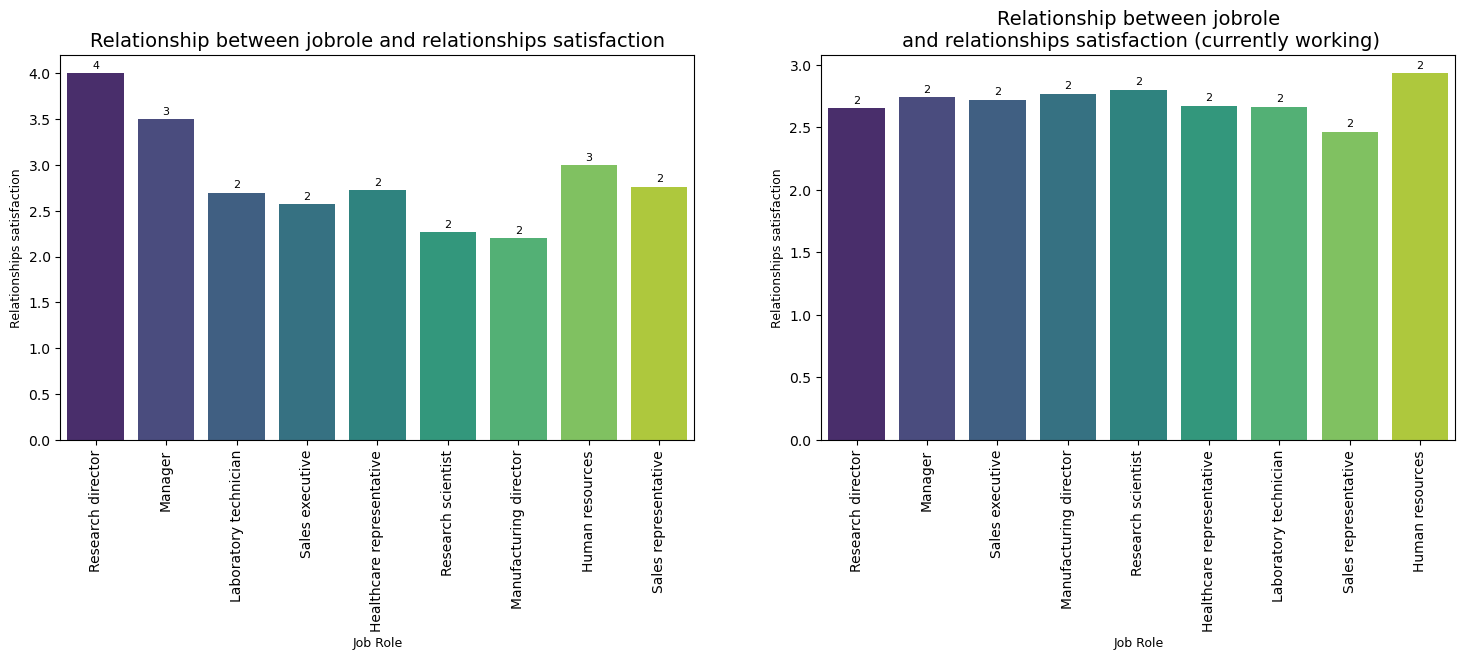

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))


sns.barplot(x = "jobrole", 
                y = "relationshipsatisfaction", 
                data = df_att_y,
                palette="viridis",
                errorbar=None,
                ax = axes[0])
axes[0].tick_params(axis="x", labelrotation=90)

axes[0].set_title("Relationship between jobrole and relationships satisfaction", fontsize= 14)
axes[0].set_xlabel("Job Role", fontsize= 9)
axes[0].set_ylabel("Relationships satisfaction", fontsize= 9)

sns.barplot(x = "jobrole", 
                y = "relationshipsatisfaction",  
                data = df_att_n,
                palette="viridis",
                errorbar=None,
                ax = axes[1])

axes[1].tick_params(axis="x", labelrotation=90)

axes[1].set_title("Relationship between jobrole\n and relationships satisfaction (currently working)", fontsize= 14)
axes[1].set_xlabel("Job Role", fontsize= 9)
axes[1].set_ylabel("Relationships satisfaction", fontsize= 9)
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2);

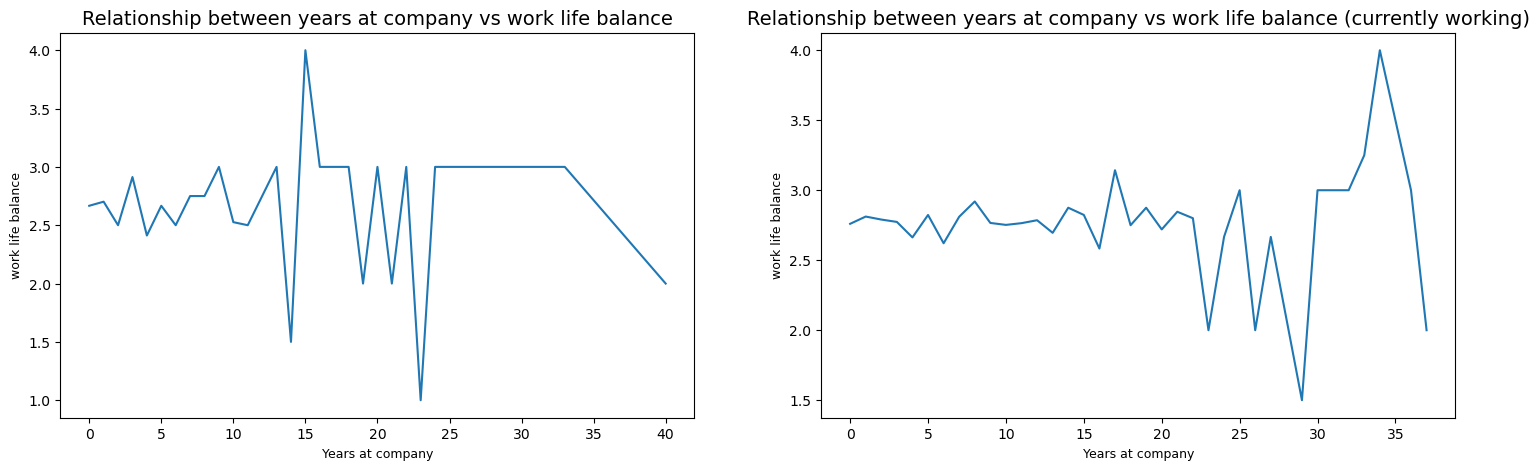

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))


sns.lineplot(x = "yearsatcompany", 
                y = "worklifebalance", 
                data = df_att_y,
                errorbar=None,
                ax = axes[0])

axes[0].set_title("Relationship between years at company vs work life balance", fontsize= 14)
axes[0].set_xlabel("Years at company", fontsize= 9)
axes[0].set_ylabel("work life balance", fontsize= 9)

sns.lineplot(x = "yearsatcompany", 
                y = "worklifebalance", 
                data = df_att_n,
                errorbar=None,
                palette= "viridis",
                ax = axes[1])

axes[1].set_title("Relationship between years at company vs work life balance (currently working)", fontsize= 14)
axes[1].set_xlabel("Years at company", fontsize= 9)
axes[1].set_ylabel("work life balance", fontsize= 9);
